### packages import :

In [1]:
### Data handling, manipulation and visualization 

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns 


# stats test for hypothesis testing

import scipy.stats as stats 


# for stastical modeling

import statsmodels.formula.api as smf

# for modeling using both stats and ML concepts 

import sklearn  # skikit learn

# from sklearn , submodels needed for data handling, variable reduction and model evaluation

from sklearn.model_selection import train_test_split ### it will split the data into train and test data 
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression # to perform linear regression 

In [2]:
cars = pd.read_csv("E:\PYTHON_ANALYTICSLAB\linear regression case study\Car_sales - 1683617576376.csv")
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
#### EDA, data inspection, data profiling 

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

### get the object and numeric type data separately:

### METHOD 1 : when data set is samll 

In [3]:
cars_object = cars.select_dtypes('object')
cars_object.head()

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [4]:
cars_numeric = cars.select_dtypes('float64')
cars_numeric.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [7]:
## this method create two dataframes separately which consumes huge data
## this method to separate datatypes works only on small datasets like we have 
## but if we have large data sets then we adopt the another method to separate data types 

### METHOD 2 : when data set is large, get only columns name 

In [10]:
cars_obj_var = cars.select_dtypes('object').columns
cars_num_var = cars.select_dtypes('float64').columns

In [13]:
cars[cars_obj_var].head()

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [15]:
cars[cars_num_var].head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


### handle numeric data 

#### 1. Get the UDF for outliers & missing value detections:

In [5]:
def continuous_var_summary(x):
    
    
    # freq and missings:
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers-iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series([x.dtype, x.nunique(), n_total, x.count(), n_miss,perc_miss, 
                      x.sum(), x.mean(),x.std(),x.var(),
                     lc_iqr, uc_iqr,
                     x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),
                     q1, x.quantile(0.5),q3,x.quantile(0.90),x.quantile(0.95),x.quantile(0.99), x.max()],

                      index = ['dtype','cardinality','n_tot','n','nmiss','perct_miss',
                            'sum','mean','std','var',
                            'lc_iqr','uc_iqr',
                            'min','p1','p5','p10',
                            'p25','p50','p75','p90','p95','p99','max']
                    )


                        
    

#### 2. Get the summary of the numeric data 

In [7]:
summ1 = cars_numeric.apply(continuous_var_summary)
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perct_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
var,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558


In [44]:
summ1.to_excel("E:\PYTHON_ANALYTICSLAB\linear regression case study\summary.xlsx")

In [8]:
cars_object.describe()

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,157,157,157,157
unique,30,156,2,130
top,Dodge,Neon,Passenger,10/5/2012
freq,11,2,116,2


### Get the following inferences:
            
            1. Categorical vs. Continuous data
            2. Look for outliers
            3. Look for missing values
            4. Look for date & time data
            5. Look for duplicates

## 12-05-2023

### Handling outliers:
            
            using .clip(lower =  p1 | lc, upper = p99 | uc)

In [12]:
cars_numeric = cars_numeric.apply(lambda x : x.clip (lower = x.quantile (0.01), 
                                                     upper = x.quantile (0.99)))
# using %tile method initially.

### Handling Missing values:
        
        imputation: ---> .fillna(mean)

In [14]:
cars_numeric = cars_numeric.apply(lambda x : x.fillna(x.mean()))

In [15]:
cars_numeric

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.36000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.87500,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.22500,27.293148,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.867124
3,8.588,29.72500,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.25500,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.01704,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,18.01704,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,18.01704,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,18.01704,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [16]:
summ1 = cars_numeric.apply(continuous_var_summary)
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,116,151,30,65,88,77,126,146,55,20,153
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
nmiss,0,0,0,0,0,0,0,0,0,0,0,0
perct_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,8002.412532,2828.67527,4285.024261,478.942387,29073.395199,16861.773921,11174.031167,29408.309317,530.530167,2816.201615,3731.298701,12068.138492
mean,50.97078,18.01704,27.293148,3.050588,185.180861,107.399834,71.172173,187.314072,3.379173,17.93759,23.766234,76.867124
std,57.19621,9.754114,13.822237,0.978335,52.109868,7.258892,3.371602,12.902866,0.617529,3.772872,3.956157,23.662945
var,3271.406468,95.142738,191.054229,0.95714,2715.438323,52.691508,11.3677,166.483942,0.381342,14.234567,15.651182,559.934944


### LR assumptions:
    
* Linear Regression is a PARAMETER model, i.e. it is based on assumptions.
* Out of 10 asusmptions, lets consider the first 4 assumptions:
        
        i. All the variables, (X & y both) should follow the NORMAL DISTRIBUTION.
        If all the variables could not follow NORMAL DISTRIBUTION, then atleast y variable should follow NORMAL DISTRIBUTION.
        
        ii. The y variable must be lineraly correlated to the x variables, else model will not have BEST FIT LINE.
        
        iii. The no. of observations > no. of variables.
        
        iv. X variables should be independent.

### CHECK THE Y VARIABLE:

C:\Users\SHUBHAM SHARMA\AppData\Local\Temp\ipykernel_15204\2272754649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_numeric.Sales_in_thousands)


<AxesSubplot: xlabel='Sales_in_thousands', ylabel='Density'>

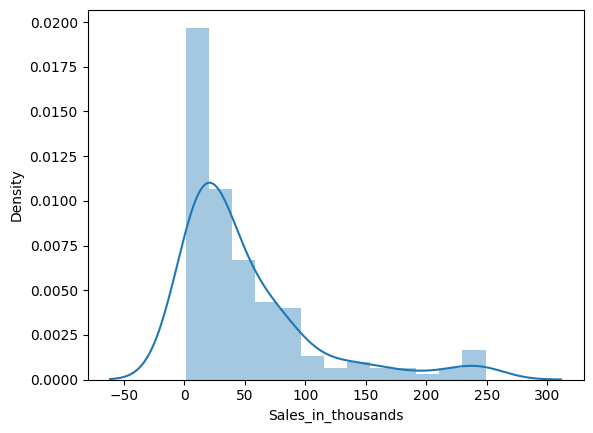

In [19]:
sns.distplot(cars_numeric.Sales_in_thousands)

#### .skew():
        
        - We can check the skewness of the data using .skew().
        - It will tell us whether the data is normally distributed or not without visualizations.
        - For the data to be normally distributed, the skewness = 0.

In [20]:
cars_numeric.Sales_in_thousands.skew()

1.9558004444927606

* **To make the y variable into normal distribution, we will TRANSFORM the data.**

        1    ---> log----> 0          
        10                 1
        100                2
        1000               3
        10000              4

In [22]:
np.log(cars_numeric.Sales_in_thousands).skew()

-0.594794558742775

C:\Users\SHUBHAM SHARMA\AppData\Local\Temp\ipykernel_15204\139175228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(cars_numeric.Sales_in_thousands))


<AxesSubplot: xlabel='Sales_in_thousands', ylabel='Density'>

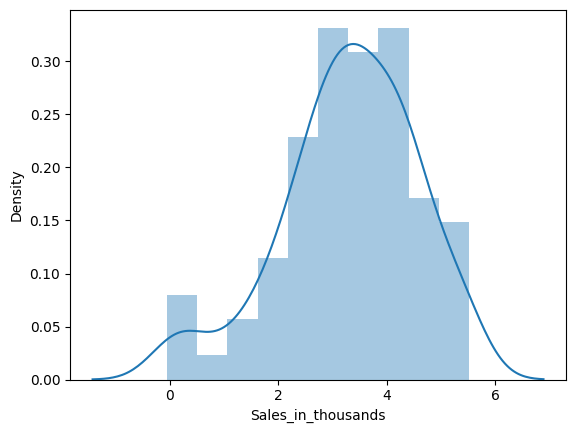

In [23]:
sns.distplot(np.log(cars_numeric.Sales_in_thousands))

### Handling Text Data:

#### Creating Dummy variables:
            
            pd.get_dummies()

In [24]:
cars_object.nunique() # cardinality of text variables

Manufacturer      30
Model            156
Vehicle_type       2
Latest_Launch    130
dtype: int64

In [25]:
cars_object.Vehicle_type.value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [29]:
cars_object = pd.get_dummies(cars_object.loc[ : : , ['Vehicle_type','Manufacturer']], drop_first= True)

In [30]:
cars_object.head()

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
cars_object.columns

Index(['Vehicle_type_Passenger', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo'],
      dtype='object')

* **While working with dummy variables, take care of INC rules.**

In [32]:
cars_object.rename(columns= {'Manufacturer_Mercedes-B' : 'Manufacturer_Mercedes_B'}, inplace= True)

In [33]:
cars_object.columns

Index(['Vehicle_type_Passenger', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo'],
      dtype='object')

### Data Combining:
            
            pd.concat(axis = 1)

In [37]:
cars_new = pd.concat([cars_object, cars_numeric], axis= 1)

In [38]:
cars_new

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1,0,0,0,0,0,0,0,0,0,...,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,1,0,0,0,0,0,0,0,0,0,...,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,1,0,0,0,0,0,0,0,0,0,...,27.293148,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.867124
3,1,0,0,0,0,0,0,0,0,0,...,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1,1,0,0,0,0,0,0,0,0,...,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,0,0,0,0,0,0,0,0,0,...,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,1,0,0,0,0,0,0,0,0,0,...,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,1,0,0,0,0,0,0,0,0,0,...,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,1,0,0,0,0,0,0,0,0,0,...,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


### Adding the tranformed Sales variables in the dataset:

In [39]:
cars_new['ln_Sales_in_thousands'] = np.log(cars_new.Sales_in_thousands)

In [40]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle_type_Passenger   157 non-null    uint8  
 1   Manufacturer_Audi        157 non-null    uint8  
 2   Manufacturer_BMW         157 non-null    uint8  
 3   Manufacturer_Buick       157 non-null    uint8  
 4   Manufacturer_Cadillac    157 non-null    uint8  
 5   Manufacturer_Chevrolet   157 non-null    uint8  
 6   Manufacturer_Chrysler    157 non-null    uint8  
 7   Manufacturer_Dodge       157 non-null    uint8  
 8   Manufacturer_Ford        157 non-null    uint8  
 9   Manufacturer_Honda       157 non-null    uint8  
 10  Manufacturer_Hyundai     157 non-null    uint8  
 11  Manufacturer_Infiniti    157 non-null    uint8  
 12  Manufacturer_Jaguar      157 non-null    uint8  
 13  Manufacturer_Jeep        157 non-null    uint8  
 14  Manufacturer_Lexus       1

In [41]:
corr = cars_new.corr()

In [43]:
corr.to_excel("E:\PYTHON_ANALYTICSLAB\linear regression case study\correlations.xlsx")

<AxesSubplot: >

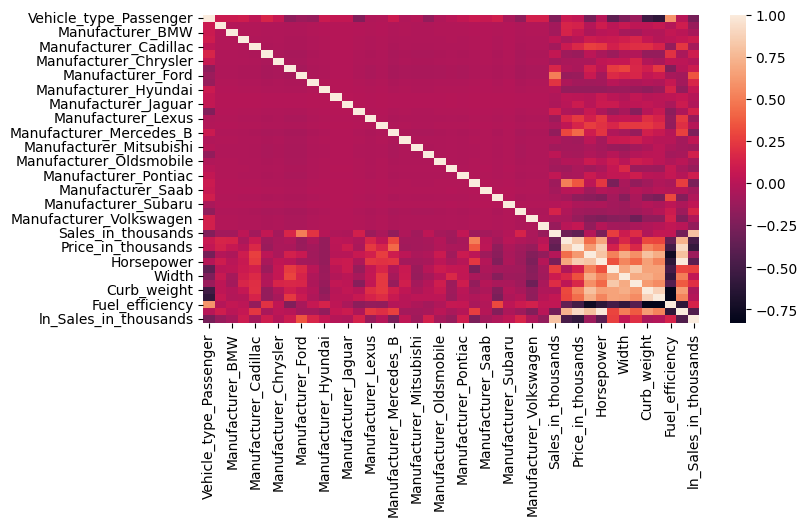

In [45]:
plt.figure(figsize = (8,4))
sns.heatmap(corr)

### VARIABLE REDUCTIONS:

        i. Feature selection| feature importance
                        f_regression()
                        
        ii. Multi-Colinearity check
                        variance_inflation_factor() ---> VIF

##### 1. Feature Selection:

In [86]:
from sklearn.feature_selection import f_regression

In [88]:
features = cars_new.columns.difference(['Sales_in_thousands', 'ln_Sales_in_thousands'])
features #  X variables only

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [90]:
### f_regression(X, y)
fscore, pvalue = f_regression(cars_new[features], cars_new.ln_Sales_in_thousands)

In [96]:
# Storing the above output in the DataFrame consisting of Features, F Score & P values:

significant_vars = pd.DataFrame( [features, fscore, pvalue]).T
significant_vars.columns = ['features','fscore','pvalue']

In [97]:
significant_vars

,features,fscore,pvalue
0,Curb_weight,0.428043,0.51392
1,Engine_size,2.324866,0.129359
2,Fuel_capacity,0.061623,0.804278
3,Fuel_efficiency,2.902204,0.090463
4,Horsepower,29.509754,0.0
5,Length,6.713437,0.010482
6,Manufacturer_Audi,2.879903,0.091699
7,Manufacturer_BMW,0.7276,0.394978
8,Manufacturer_Buick,1.20044,0.274933
9,Manufacturer_Cadillac,0.888978,0.347222


In [101]:
#### Significant variables are those variables with p value <=0.1

significant_vars.loc[significant_vars.pvalue <= 0.1, 'features']

3             Fuel_efficiency
4                  Horsepower
5                      Length
6           Manufacturer_Audi
13          Manufacturer_Ford
14         Manufacturer_Honda
21    Manufacturer_Mercedes_B
26      Manufacturer_Plymouth
28       Manufacturer_Porsche
32        Manufacturer_Toyota
34         Manufacturer_Volvo
35          Power_perf_factor
36         Price_in_thousands
37     Vehicle_type_Passenger
38                  Wheelbase
40     four_year_resale_value
Name: features, dtype: object

In [102]:
features = list(significant_vars.loc[significant_vars.pvalue <= 0.1, 'features'])
features

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

##### ii. Multi-Colinearity Check:
        
     - happens on only X variables
            
     using vif()
          
     The variables are said to be highly co-linear with each other, if their vif factor values > 5

In [115]:
from patsy import dmatrices

# it will generate the intercept of all the features in the form of DataFrame.
# By default, the intercept value is 1.0

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# y, X = dmatrices(formula = model_param, data, return_type = 'dataframe')

In [104]:
model_param = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)
model_param

'ln_Sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [105]:
y, X = dmatrices(model_param, cars_new, return_type = 'dataframe')

In [106]:
y

,ln_Sales_in_thousands
0,2.828437
1,3.673360
2,2.647167
3,2.150366
4,3.015388
...,...
152,1.265538
153,2.724252
154,2.863971
155,1.250761


In [107]:
X

,Intercept,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Mercedes_B,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,four_year_resale_value
0,1.0,28.0,140.0,172.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.280150,21.500000,1.0,101.2,16.36000
1,1.0,25.0,225.0,192.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.370778,28.400000,1.0,108.1,19.87500
2,1.0,26.0,225.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.867124,27.293148,1.0,106.9,18.22500
3,1.0,22.0,210.0,196.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.389779,42.000000,1.0,114.6,29.72500
4,1.0,27.0,150.0,178.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.777639,23.990000,1.0,102.6,22.25500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.0,25.0,160.0,176.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.498812,24.400000,1.0,100.5,18.01704
153,1.0,25.0,168.0,185.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.654495,27.500000,1.0,104.9,18.01704
154,1.0,25.0,168.0,186.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,71.155978,28.800000,1.0,104.9,18.01704
155,1.0,23.0,236.0,185.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,101.623357,45.500000,1.0,104.9,18.01704


In [108]:
vif = pd.DataFrame()
vif

""


In [110]:
vif['Features'] = X.columns

In [118]:
vif['vif_score'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

In [120]:
vif.head()

,Features,vif_score
0,Intercept,662.869892
1,Fuel_efficiency,4.385962
2,Horsepower,160.182314
3,Length,5.660592
4,Manufacturer_Audi,1.076559


##### Start removing the insignificant variables ( needs to be done manually )

Removing power_perf_factor

In [183]:
model_param = 'ln_Sales_in_thousands ~  Fuel_efficiency + Horsepower + Manufacturer_Ford + Price_in_thousands + Vehicle_type_Passenger'
model_param

'ln_Sales_in_thousands ~  Fuel_efficiency + Horsepower + Manufacturer_Ford + Price_in_thousands + Vehicle_type_Passenger'

In [184]:
y, X = dmatrices(model_param, cars_new, return_type = 'dataframe')

In [185]:
vif = pd.DataFrame()
vif

""


In [186]:

vif['Features'] = X.columns
vif['vif_score'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

In [187]:
vif

,Features,vif_score
0,Intercept,207.128410
1,Fuel_efficiency,3.637703
2,Horsepower,4.760598
3,Manufacturer_Ford,1.039671
4,Price_in_thousands,3.742257
5,Vehicle_type_Passenger,2.281046


In [188]:
vif.loc[1: : , 'Features']

1           Fuel_efficiency
2                Horsepower
3         Manufacturer_Ford
4        Price_in_thousands
5    Vehicle_type_Passenger
Name: Features, dtype: object

In [189]:
features = list(vif.loc[1: : , 'Features'])

In [190]:
features

['Fuel_efficiency',
 'Horsepower',
 'Manufacturer_Ford',
 'Price_in_thousands',
 'Vehicle_type_Passenger']

### DATA MODELLING:

##### i. Train- test Split: 7:3

In [59]:
#### Method 1: using statsmodel:

train,test = train_test_split(cars_new, train_size= 0.7, test_size= 0.3, random_state= 1)

In [62]:
train.head(3)

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands
135,0,0,0,0,0,0,0,0,0,0,...,2.5,165.0,99.4,68.3,175.2,3.125000,15.9,24.0,66.762943,3.497356
77,1,0,0,0,0,0,0,0,0,0,...,4.6,215.0,117.7,78.2,215.3,4.121000,19.0,21.0,93.957917,3.890002
18,0,0,0,0,1,0,0,0,0,0,...,5.7,255.0,117.5,77.0,201.2,5.393358,30.0,15.0,109.509117,2.693613


In [63]:
test.head(3)

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands
117,1,0,0,0,0,0,0,0,0,0,...,3.5,253.0,113.3,76.3,165.4,2.850,12.0,21.0,106.984456,0.627007
75,0,0,0,0,0,0,0,0,0,0,...,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,91.943802,3.936481
51,1,0,0,0,0,0,0,0,1,0,...,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0,80.499537,4.149511


In [65]:
features = cars_new.columns.difference(['Sales_in_thousands','ln_Sales_in_thousands'])
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [67]:
### Method 2: Train test split using ML functions, i.e. sklearn 

x_train,x_test,y_train,y_test = train_test_split(cars_new[features], cars_new.ln_Sales_in_thousands,
                                test_size= 0.3, random_state= 1 )

In [69]:
x_train.head(3)

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value
135,3.125000,2.5,15.9,24.0,165.0,175.2,0,0,0,0,...,1,0,0,0,66.762943,20.095,0,99.4,68.3,18.01704
77,4.121000,4.6,19.0,21.0,215.0,215.3,0,0,0,0,...,0,0,0,0,93.957917,43.330,1,117.7,78.2,21.72500
18,5.393358,5.7,30.0,15.0,255.0,201.2,0,0,0,1,...,0,0,0,0,109.509117,46.225,0,117.5,77.0,18.01704


In [70]:
x_test.head(3)

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value
117,2.850,3.5,12.0,21.0,253.0,165.4,0,0,0,0,...,0,0,0,0,106.984456,43.000,1,113.3,76.3,18.01704
75,3.900,3.0,17.2,21.0,220.0,180.1,0,0,0,0,...,0,0,0,0,91.943802,34.605,0,103.0,71.5,18.01704
51,3.908,4.6,19.0,21.0,200.0,212.0,0,0,0,0,...,0,0,0,0,80.499537,22.195,1,114.7,78.2,14.21000


In [72]:
y_train.head(3)

135    3.497356
77     3.890002
18     2.693613
Name: ln_Sales_in_thousands, dtype: float64

In [74]:
y_test.head(3)

117    0.627007
75     3.936481
51     4.149511
Name: ln_Sales_in_thousands, dtype: float64

##### Steps for model building:
------------------------------------------------------------------
    Step 1: lm = smf.ols('y~x1+x2+x3...xn', data = train) # defining Y and X with classs
    
    Step 2: lm.fit()     # building model (estimating the betas)
    
    Step 3: lm.summary() # get the output summary of the model
    
    Step 4: lm.predict(train) # predict the sales on the training data
    
    Step 5: lm.predict(test) # predict the sales on the testing/validation data
    
    Step 6: test the accuracy of the model
        a.  MAPE: Mean Absolute Percentage Error
        b.  RMSE: Root Mean Square Error
        c.  Corelation between actual and predicted
        d.  Decile analysis: for validation of models - Business validation
    
    
        R square:
        1 - SSE(best fit) / SSE(no slope)
        
        Adjusted R square:
        1 - [(1 - R2)(n - 1) / (n - k - 1)]


###### ii. Define the model:
                
                The model is always created on TRAIN data.
                
                 import statsmodels.formula.api as smf
                 smf.ols( formula, dataframe = train)
                 

### Model 0: 
            
         Considering all the X variables, i.e. no feature selection & no multi-colinearity check

* **FORMULA:**
            
             y ~ x1 + x2 + x3 + ......

In [76]:
form0 = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)
form0

'ln_Sales_in_thousands ~ Curb_weight + Engine_size + Fuel_capacity + Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_BMW + Manufacturer_Buick + Manufacturer_Cadillac + Manufacturer_Chevrolet + Manufacturer_Chrysler + Manufacturer_Dodge + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Hyundai + Manufacturer_Infiniti + Manufacturer_Jaguar + Manufacturer_Jeep + Manufacturer_Lexus + Manufacturer_Lincoln + Manufacturer_Mercedes_B + Manufacturer_Mercury + Manufacturer_Mitsubishi + Manufacturer_Nissan + Manufacturer_Oldsmobile + Manufacturer_Plymouth + Manufacturer_Pontiac + Manufacturer_Porsche + Manufacturer_Saab + Manufacturer_Saturn + Manufacturer_Subaru + Manufacturer_Toyota + Manufacturer_Volkswagen + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + Width + four_year_resale_value'

In [77]:
lm0 = smf.ols(form0, train)
lm0

##### iii. Fit the model:
            
            .fit()
            - It will create all the possible slope lines at the backend, & then the final slope line will be selected which is called "BEST FIT LINE."

In [78]:
lm0 = lm0.fit()
lm0

###### iv. Summary of the model:
           
           using .summary()

In [80]:
print(lm0.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.704
Model:                               OLS   Adj. R-squared:                  0.530
Method:                    Least Squares   F-statistic:                     4.046
Date:                   Tue, 16 May 2023   Prob (F-statistic):           2.03e-07
Time:                           00:04:29   Log-Likelihood:                -111.72
No. Observations:                    109   AIC:                             305.4
Df Residuals:                         68   BIC:                             415.8
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Model 1:
            
            Considering only the significant variables.

##### i. Formula for model1 & define the model:

In [81]:
formula_m1 = '''ln_Sales_in_thousands ~ Price_in_thousands + Manufacturer_Ford + Length + 
Fuel_efficiency + Vehicle_type_Passenger'''
formula_m1

'ln_Sales_in_thousands ~ Price_in_thousands + Manufacturer_Ford + Length + \nFuel_efficiency + Vehicle_type_Passenger'

In [82]:
lm1 = smf.ols(formula_m1, train)
lm1

##### ii. Fit the model:

In [83]:
lm1 = lm1.fit()
lm1

##### iii. Summary of the linear model 1:

In [85]:
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.495
Model:                               OLS   Adj. R-squared:                  0.471
Method:                    Least Squares   F-statistic:                     20.21
Date:                   Tue, 16 May 2023   Prob (F-statistic):           5.31e-14
Time:                           00:08:07   Log-Likelihood:                -140.83
No. Observations:                    109   AIC:                             293.7
Df Residuals:                        103   BIC:                             309.8
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

* **From Model 0 to Model 1, the signifcant variables are the part of the model, which is achieved with the help of VARIABLE REDUCTIONS Step.**

## 15-05-2023

#### MODEL 2:  After performing variable reductions

In [191]:
features = ['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

In [197]:
# model equation: y ~ x1 + x2 +.....

model_param = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)
model_param

'ln_Sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [216]:
model_param = 'ln_Sales_in_thousands ~ Fuel_efficiency + Length + Price_in_thousands + Vehicle_type_Passenger '

In [217]:
y, X = dmatrices(model_param, cars_new, return_type = 'dataframe')

In [218]:
vif = pd.DataFrame()
vif

""


In [219]:
vif['Features'] = X.columns

In [220]:
vif['VIF_Score'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]
vif

,Features,VIF_Score
0,Intercept,563.053378
1,Fuel_efficiency,3.443151
2,Length,1.289788
3,Price_in_thousands,1.854438
4,Vehicle_type_Passenger,2.196125


In [221]:
features = list( vif.loc[ 1 : : , 'Features'] )
features

['Fuel_efficiency', 'Length', 'Price_in_thousands', 'Vehicle_type_Passenger']

In [222]:
##### Define & fit the model:

formula2 = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)

m2 = smf.ols(formula2, data =  train).fit()
m2

In [223]:
##### summary of the model, m2:

print(m2.summary() )

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.440
Model:                               OLS   Adj. R-squared:                  0.418
Method:                    Least Squares   F-statistic:                     20.40
Date:                   Tue, 16 May 2023   Prob (F-statistic):           1.98e-12
Time:                           19:17:32   Log-Likelihood:                -146.52
No. Observations:                    109   AIC:                             303.0
Df Residuals:                        104   BIC:                             316.5
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [225]:
##### Predictions on train & test data both:abs

train['predict'] = np.exp( m2.predict(train) )
train.head()

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands,predict
135,0,0,0,0,0,0,0,0,0,0,...,165.0,99.4,68.3,175.2,3.125000,15.9,24.0,66.762943,3.497356,48.928138
77,1,0,0,0,0,0,0,0,0,0,...,215.0,117.7,78.2,215.3,4.121000,19.0,21.0,93.957917,3.890002,17.524068
18,0,0,0,0,1,0,0,0,0,0,...,255.0,117.5,77.0,201.2,5.393358,30.0,15.0,109.509117,2.693613,15.716179
48,1,0,0,0,0,0,0,0,1,0,...,170.0,106.5,69.1,184.6,2.769000,15.0,25.0,67.351011,3.557289,33.367501
4,1,1,0,0,0,0,0,0,0,0,...,150.0,102.6,68.2,178.0,2.998000,16.4,27.0,62.777639,3.015388,23.016425


In [226]:
test['predict'] = np.exp( m2.predict(test))
test.head()

,Vehicle_type_Passenger,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands,predict
117,1,0,0,0,0,0,0,0,0,0,...,253.0,113.3,76.3,165.4,2.850,12.0,21.0,106.984456,0.627007,4.232023
75,0,0,0,0,0,0,0,0,0,0,...,220.0,103.0,71.5,180.1,3.900,17.2,21.0,91.943802,3.936481,22.888766
51,1,0,0,0,0,0,0,0,1,0,...,200.0,114.7,78.2,212.0,3.908,19.0,21.0,80.499537,4.149511,43.051014
31,1,0,0,0,0,0,1,0,0,0,...,132.0,108.0,71.0,186.0,2.911,16.0,27.0,53.566200,3.475253,41.249031
35,1,0,0,0,0,0,0,1,0,0,...,132.0,105.0,74.4,174.4,2.567,12.5,29.0,52.084899,4.331181,40.932465


### Evaluate model accuracy on both train & test data:
                
                mse, rmse, mae, mape

In [231]:
train_mse = mean_squared_error(train.Sales_in_thousands, train.predict)
test_mse = mean_squared_error(test.Sales_in_thousands, test.predict)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(train.Sales_in_thousands, train.predict)
test_mae = mean_absolute_error(test.Sales_in_thousands, test.predict)

train_mape = mean_absolute_percentage_error(train.Sales_in_thousands, train.predict)
test_mape  = mean_absolute_percentage_error(test.Sales_in_thousands, test.predict)


print('MSE for Train data :', train_mse, '|', 'MSE for Test data :', test_mse)
print('RMSE for Train data :', train_rmse, '|', 'RMSE for Test data :', test_rmse)
print('MAE for Train data :', train_mae, '|', 'MAE for Test data :', test_mae)
print('MAPE for Train data :', train_mape, '|', 'MAPE for Test data :', test_mape)

MSE for Train data : 2591.2151744074736 | MSE for Test data : 3020.423913557497
RMSE for Train data : 50.903979946635545 | RMSE for Test data : 54.958383469289714
MAE for Train data : 29.236550291209053 | MAE for Test data : 32.75592343162012
MAPE for Train data : 1.2210915315037385 | MAPE for Test data : 0.7677362974094156


### CO-RELATIONS BETWEEN y_actual & y_predicted:

<AxesSubplot: xlabel='Sales_in_thousands', ylabel='predict'>

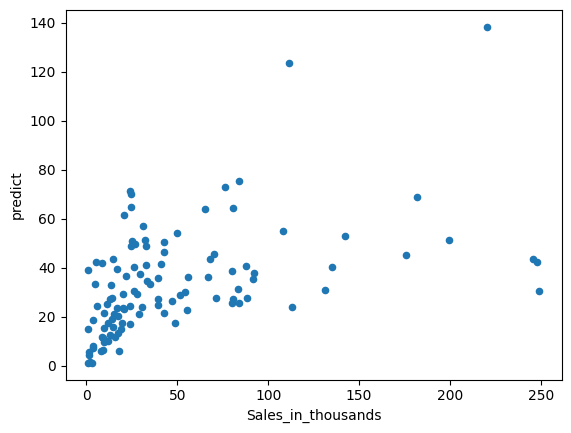

In [234]:
train.plot(x = 'Sales_in_thousands', y = 'predict', kind = 'scatter')

In [236]:
stats.pearsonr(train.Sales_in_thousands, train.predict)

PearsonRResult(statistic=0.4798332533444334, pvalue=1.2963208868552084e-07)

### DECILES ANALYSIS on both train & test data:

In [239]:
train['deciles'] = pd.qcut(train.predict, 10, labels = range (1,11))
train.loc[ : : , ['Sales_in_thousands', 'predict', 'deciles']]

,Sales_in_thousands,predict,deciles
135,33.028,48.928138,9
77,48.911,17.524068,3
18,14.785,15.716179,2
48,35.068,33.367501,6
4,20.397,23.016425,4
...,...,...,...
133,49.989,53.959358,9
137,247.994,42.215339,8
72,3.334,7.187733,1
140,84.087,75.272431,10


In [240]:
train.groupby('deciles')[['Sales_in_thousands','predict']].mean()

,Sales_in_thousands,predict
deciles,,
1,5.524416,5.158519
2,13.084234,13.487430
3,24.338818,19.851827
4,40.465182,24.355434
5,46.075182,28.035492
6,70.726969,32.795576
7,55.772455,38.494743
8,86.571455,43.317171
9,65.048727,51.890359


In [246]:
test['deciles'] = pd.qcut(test.predict, 10,labels = range(1,11))
test.loc[ : : , ['Sales_in_thousands', 'predict', 'deciles']].head()

,Sales_in_thousands,predict,deciles
117,1.872,4.232023,1
75,51.238,22.888766,5
51,63.403,43.051014,8
31,32.306,41.249031,7
35,76.034,40.932465,7


In [247]:
test.groupby('deciles')[['Sales_in_thousands', 'predict']].mean()

,Sales_in_thousands,predict
deciles,,
1,5.972400,3.429189
2,14.874400,10.624425
3,21.696200,17.129021
4,26.008750,19.825281
5,69.495200,27.455404
6,50.091400,31.644648
7,61.402000,39.300732
8,105.244200,44.191089
9,57.504200,53.498699


* **From the decile analysis, it is evident that the model is not working.**

* **PROBLEMS WITH LINEAR REGRESSION :**
        
        1. Multi-Colinearity
        2. Outliers
        3. Serial Corelations | Auto Corelation:
                    
                    The error patterns tends to repeat with time.
        
        4.Heteroscedascticity:
                    Values show clustures while checking co-relations.

* **The model is built on the 4 assumptions. The remaining assumptions are on the basis of errors, i.e. RESIDUALS.**

#### Other Assumptions:

##### 1. Mean of errors must be 0:

            resid = y_actual - y_predict

In [249]:
print("Mean of errors in the model: ", m2.resid.mean())

Mean of errors in the model:  3.8354640564481556e-14


##### 3. Relationship between the errors & y variables:
            
            There should NOT be any co-relation betwen the model erros & y variable.

In [258]:
stats.pearsonr(m2.resid, train.ln_Sales_in_thousands)

PearsonRResult(statistic=0.7485624275919533, pvalue=8.229775741836273e-21)

#### What can be the possible reasons for poor model performance?

1. Small sample 
2. Assumptions of linear/regression modelling are not true for the model in consideration.

#### Possible reasons for model is not validating (over fitting)
---------------------------------------------------------------------------------------------
1. Data preparation problem (outliers, missings, variable conversions etc. not correct)
2. not included right variables
3. If the data have multicollinerity
4. Including more number of variables 
5. Data size is very low  (ideally we should have 1varaible = 100 obs)
6. The assumptions are not 100% valid
7. The variables are not explaining completely

#### How to over come this problem?
--------------------------------------------------------------------------------------------
1. Increase the data/sample size
2. Change the variables - Reiterate the model with different combinations of variables
3. Apply right transformations on X variables such the the linear relationship between Y & X will imrpvove
4. Add dervied variables which can explain Y better
5. Re look into data preparation steps
6. Look at the importance of variables include them in the model
7. Change the modelling technique

******************
There are few techniques can help you to identify important variables (Variable selection - Feature selection)
* F-Regression
* RFE (Recursive feature elimination) - Stepwise regression
******************